In [1]:
import pandas as pd
from sqlite3 import connect

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
con = connect('/content/drive/MyDrive/School21/day12/data/checking-logs.sqlite')

#Task 3: Столбиковая диаграмма (barchart)#

У нас есть еще один вопрос, на который необходимо ответить: когда пользователи обычно выполняют лабораторные задания (делают коммиты): ночью, утром, днем или вечером? И как их поведение менялось с течением времени?
Выполните необходимые шаги по созданию следующего графика:
*   Анализируйте только пользователей, а не администраторов.
*   Используйте фильтр status = 'ready' для коммитов.
*   Размеры шрифта и figsize такие же, как и раньше.
*   Ночь — с 0:00:00 до 03:59:59, утро — с 04:00:00 до 09:59:59, день — с 10:00:00 до 16:59:59, вечер — с 17:00:00 до 23:59:59.
*   Выберите цветовую палитру по своему вкусу, не обязательно использовать те же самые цвета, что на графике выше.










In [4]:
commits = pd.read_sql("select timestamp from checker where status = 'ready' and uid like 'user_%'", con)

In [5]:
commits['timestamp'] = commits['timestamp'].astype('datetime64[ns]')

In [6]:
commits['times'] =pd.cut(commits.timestamp.dt.hour, bins = [0, 4, 10, 17, 24], labels=['ночь', 'утро', 'день', 'вечер'], right=False)

In [7]:
commits

,timestamp,times
0,2020-04-17 05:19:02.744528,утро
1,2020-04-17 05:22:45.549397,утро
2,2020-04-17 05:34:24.422370,утро
3,2020-04-17 05:43:27.773992,утро
4,2020-04-17 05:46:32.275104,утро
...,...,...
1681,2020-05-21 20:01:48.959966,вечер
1682,2020-05-21 20:18:54.487900,вечер
1683,2020-05-21 20:19:06.872761,вечер
1684,2020-05-21 20:22:41.877806,вечер


In [8]:
commits_grp = commits.groupby([commits['timestamp'].dt.date, 'times']).count()

In [9]:
commits_grp

timestamp
timestamp  times           
2020-04-17 ночь           0
           утро           7
           день           6
           вечер          0
2020-04-18 ночь           0
...                     ...
2020-05-20 вечер          6
2020-05-21 ночь           0
           утро           1
           день          15
           вечер         11

[140 rows x 1 columns]

In [10]:
commits_grp = commits_grp.unstack(-1)

In [11]:
commits_grp

timestamp                
times           ночь утро день вечер
timestamp                           
2020-04-17         0    7    6     0
2020-04-18         0    1   19    19
2020-04-19         1    2    9     6
2020-04-20         0    0    8     8
2020-04-21         0    0    0    13
2020-04-22         0    0    3    13
2020-04-23         2    3    8    11
2020-04-24         0    0    2     6
2020-04-25         1   13   17    26
2020-04-26         1    4   45    87
2020-04-27         1    1    0     1
2020-04-28         0    0    3     0
2020-04-29         0    0    0     9
2020-04-30         0    2    7    19
2020-05-01         0    1    6    27
2020-05-02         0    4  104    21
2020-05-03         0   13   46    41
2020-05-04         0    3   16     0
2020-05-05         0    8   61     3
2020-05-06         0    1    0     0
2020-05-07         0    0   15    12
2020-05-08         0    0   14    30
2020-05-09         0    0    6    37
2020-05-10         4    1   56    12
2020-05-11         0    1   21    73
2020-05-12         0   20   35   108
2020-05-13         0    2   30    74
2020-05-14         2    1  146   141
2020-05-15         0    0    5     0
2020-05-16         0    0    0     3
2020-05-17         0    2    6    20
2020-05-18         0    0    1     2
2020-05-19         0    9   11     3
2020-05-20         0    4    7     6
2020-05-21         0    1   15    11

In [12]:
commits_grp.shape

(35, 4)

Text(0.5, 0, 'date')

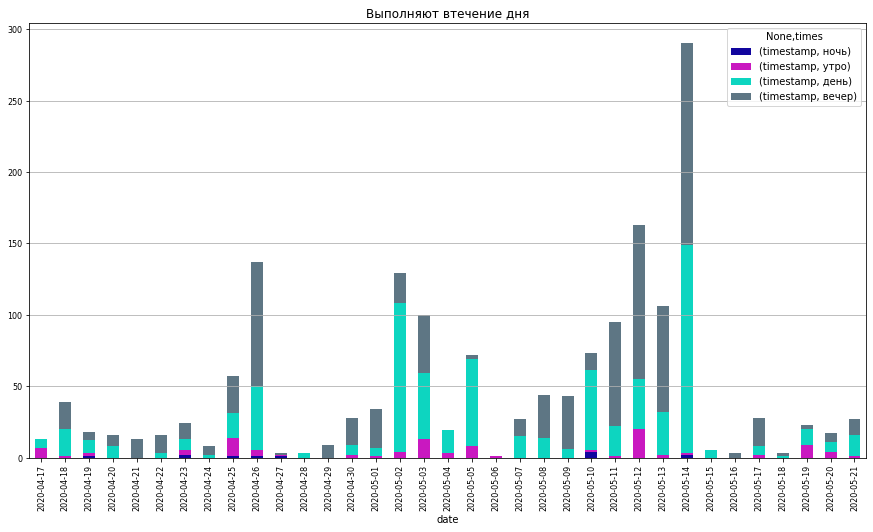

In [13]:
plt = commits_grp.plot(kind = 'bar', stacked = True, figsize = (15,8), fontsize = 8 , title = 'Выполняют втечение дня', color = ['#11059E', '#C918C0', '#0DD5C0','#5E7684'])
plt.grid(axis='y')
plt.set_xlabel('date')

В конце Jupyter Notebook создайте markdown-ячейки и вставьте в них следующие вопросы.

«Когда пользователи обычно выполняют лабораторные задания: ночью, утром, днем или вечером?». Ответ — два наиболее распространенных периода времени.


День, Вечер

«В какой день имеется наибольшее количество коммитов и одновременно с этим количество коммитов вечером выше, чем днем?» Ответ — дата этого дня.

12 мая 2020